In [27]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import plot as plt
from matplotlib.pyplot import subplot
import pandas as pd
import numpy as np

In [2]:
boston = load_boston()
X_train = boston.data[:380]
y_train = boston.target[:380]
X_test = boston.data[380:]
y_test = boston.target[380:]

In [3]:
base_algorithms_list = []
coefficients_list = []
y_cur = np.array(y_train)

In [4]:
def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X]

In [5]:
regr = None
for i in range(50):
    regr = DecisionTreeRegressor(max_depth=5, random_state=42).fit(X_train, y_cur)
    base_algorithms_list.append(regr)
    coefficients_list.append(0.9 / (1.0 + i))
    y_cur = y_train - gbm_predict(X_train)
    mse = np.sqrt(mean_squared_error(y_test, gbm_predict(X_test)))
    print(str(i) + " step, MSE = " + str(mse))

0 step, MSE = 4.674470252481672
1 step, MSE = 4.86124886818998
2 step, MSE = 4.960646377464036
3 step, MSE = 4.978993136056313
4 step, MSE = 5.013499893304392
5 step, MSE = 5.069749769361918
6 step, MSE = 5.094400870696804
7 step, MSE = 5.102776948429936
8 step, MSE = 5.102742566459316
9 step, MSE = 5.112648322110421
10 step, MSE = 5.127464530933443
11 step, MSE = 5.13513847070184
12 step, MSE = 5.139425578199816
13 step, MSE = 5.144815790473271
14 step, MSE = 5.1490366253302575
15 step, MSE = 5.154794760489725
16 step, MSE = 5.155246515891976
17 step, MSE = 5.168650990165376
18 step, MSE = 5.174788999087556
19 step, MSE = 5.183252108018849
20 step, MSE = 5.177529028792435
21 step, MSE = 5.189818168357995
22 step, MSE = 5.186360416405536
23 step, MSE = 5.19587593194752
24 step, MSE = 5.199091721078423
25 step, MSE = 5.205802995360604
26 step, MSE = 5.210314066155946
27 step, MSE = 5.204373068035205
28 step, MSE = 5.210112797158431
29 step, MSE = 5.213945657431475
30 step, MSE = 5.21146

[8.259653364187779, 5.2892515229294705, 4.738360335342617]
[8.901153390070753, 6.216866929781595, 5.994644731079903]
[8.712652625529445, 5.927752641266662, 5.719231651160758]
[8.686312515310327, 6.066710128126187, 5.859880348556008]
[8.686312515310327, 6.066710128126187, 5.859880348556008]
[8.686312515310327, 6.066710128126187, 5.859880348556008]
[8.686312515310327, 6.066710128126187, 5.859880348556008]
[8.686312515310327, 6.066710128126187, 5.859880348556008]


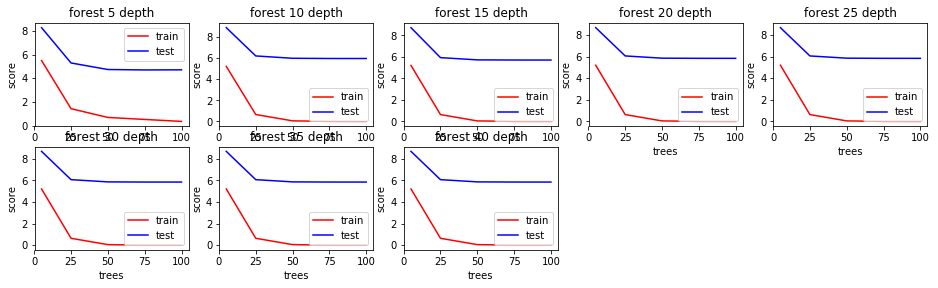

In [26]:
tree_count =  [5, 25, 50, 75, 100]
depth = [5, 10, 15, 20, 25, 30, 35, 40]
pyplot.figure(figsize=(16, 11))
i = 1
for d in depth:
    scores_train = []
    scores_test = []
    for num in tree_count:
        boost = GradientBoostingRegressor(n_estimators=num, max_depth=d, random_state=42).fit(X_train, y_train)
        scores_train.append(np.sqrt(mean_squared_error(y_train, boost.predict(X_train))))
        scores_test.append(np.sqrt(mean_squared_error(y_test, boost.predict(X_test))))
    print(scores_test[:3])
    ax = subplot(5, 5, i)
    ax.set_title("forest {} depth".format(d))
    pyplot.plot(tree_count, scores_train, color="red", label="train")
    pyplot.plot(tree_count, scores_test, color="blue", label="test")
    pyplot.xlabel("trees")
    pyplot.ylabel("score")
    pyplot.legend()
    i += 1

In [28]:
linRegModel = LinearRegression().fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [32]:
np.sqrt(mean_squared_error(y_test, linRegModel.predict(X_test)))

7.819688142087218

In [33]:
7.819688142087218 - 5.241033584774468

2.57865455731275